Online Retails Purchase
=====

### Reference : https://github.com/guipsamora/pandas_exercises/blob/master/07_Visualization/Online_Retail/Exercises_with_solutions_code.ipynb

In [17]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'ticks')

In [18]:
# 2,3 
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(url, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


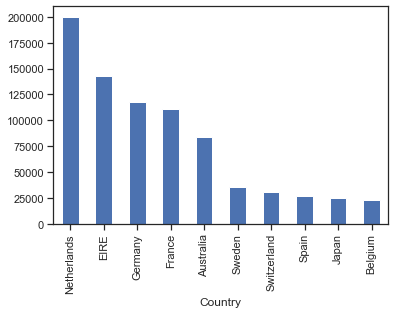

In [19]:
# 4
top10_quantity = online_rt.groupby('Country').sum()['Quantity'].sort_values(ascending = False)[1:11]
top10_quantity.plot(kind = 'bar')

In [26]:
# 5
# online_rt['Quantity'] = online_rt['Quantity'] >= 0
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,True,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,True,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,True,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,True,12/1/10 8:26,3.39,17850.0,United Kingdom


In [27]:
# 6
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,2.0,2.08
12347.0,Iceland,182.0,481.21
12348.0,Finland,31.0,178.71
12349.0,Italy,73.0,605.10
12350.0,Norway,17.0,65.30


In [30]:
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
customers.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,2.0,2.08,United Kingdom
12347.0,Iceland,182.0,481.21,Iceland
12348.0,Finland,31.0,178.71,Finland
12349.0,Italy,73.0,605.10,Italy
12350.0,Norway,17.0,65.30,Norway


In [31]:
top_countries =  ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]

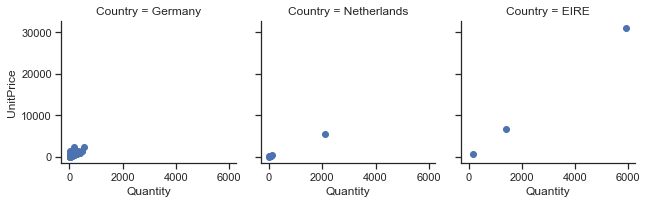

In [32]:
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [33]:
# 7
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,2.0,2.08
12347.0,Iceland,182.0,481.21
12348.0,Finland,31.0,178.71
12349.0,Italy,73.0,605.10
12350.0,Norway,17.0,65.30


In [34]:
customers.UnitPrice.dtype

dtype('float64')

In [35]:
display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,True,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,True,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,True,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,True,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,True,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,True,1/18/11 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,True,1/18/11 10:17,1.04,12346.0,United Kingdom


In [36]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Germany', 'France', 'EIRE'], dtype='object', name='Country')

In [37]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,12/1/10 8:26,2.55,17850.0,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,True,12/1/10 8:26,3.39,17850.0,United Kingdom,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,True,12/1/10 8:26,2.75,17850.0,United Kingdom,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,True,12/1/10 8:26,3.39,17850.0,United Kingdom,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,True,12/1/10 8:26,3.39,17850.0,United Kingdom,3.39


In [38]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12413.0,France,40.0,210.29,5.257250,France
12426.0,Germany,30.0,118.09,3.936333,Germany
12427.0,Germany,35.0,161.17,4.604857,Germany
12437.0,France,201.0,809.45,4.027114,France
12441.0,France,11.0,40.71,3.700909,France


[]

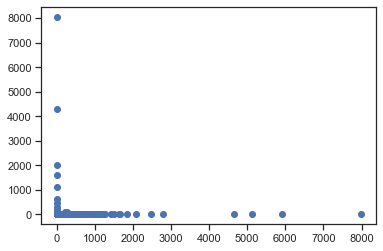

In [39]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

[]

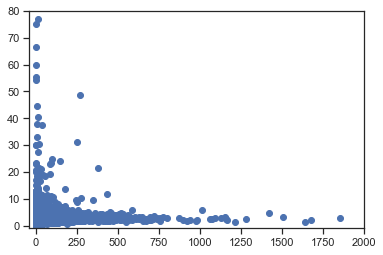

In [40]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

In [41]:
# 8
price_start = 0 
price_end = 50
price_interval = 1

buckets = np.arange(price_start,price_end,price_interval)

revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]     70248.924
(1, 2]    211871.520
(2, 3]    255979.500
(3, 4]    141182.240
(4, 5]    253742.280
Name: Revenue, dtype: float64

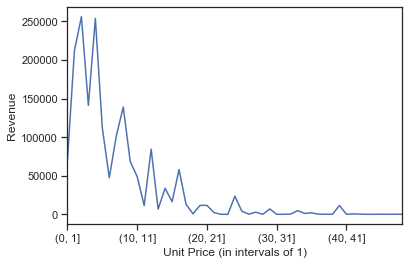

In [42]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

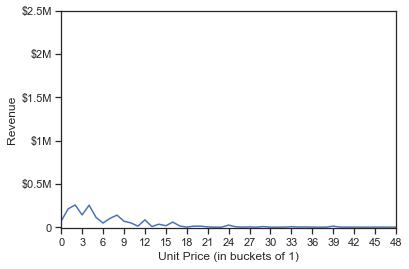

In [43]:
revenue_per_price.plot()

plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()